<a href="https://colab.research.google.com/github/ChintzRuparel/Stock-Market-Prediction-Using-LSTM/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

### data set reading

In [ ]:
df = pd.read_csv('NIFTY_50.csv') ##Source File to be changed here
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/10/2018,215.15,4642146.0,208.00,222.25,206.85
1,05/10/2018,209.20,3519515.0,217.00,218.60,205.90
2,04/10/2018,218.20,1728786.0,223.50,227.80,216.15
3,03/10/2018,227.60,1708590.0,230.00,237.50,225.75
4,01/10/2018,230.90,1534749.0,234.55,234.60,221.05


### preprocessing data set to perform analysis

In [ ]:
df.shape

(1235, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1235 non-null   object 
 1   Close/Last  1235 non-null   float64
 2   Volume      1235 non-null   float64
 3   Open        1235 non-null   float64
 4   High        1235 non-null   float64
 5   Low         1235 non-null   float64
dtypes: float64(5), object(1)
memory usage: 58.0+ KB


In [ ]:
df1 = df.iloc[:,1]
df1.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close/Last, dtype: float64

In [ ]:
df1.tail()

1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close/Last, dtype: float64

In [ ]:
df1 = df1.replace('[\$,]', '', regex=True).astype(float)
df1.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close/Last, dtype: float64

Text(0, 0.5, 'stock price')

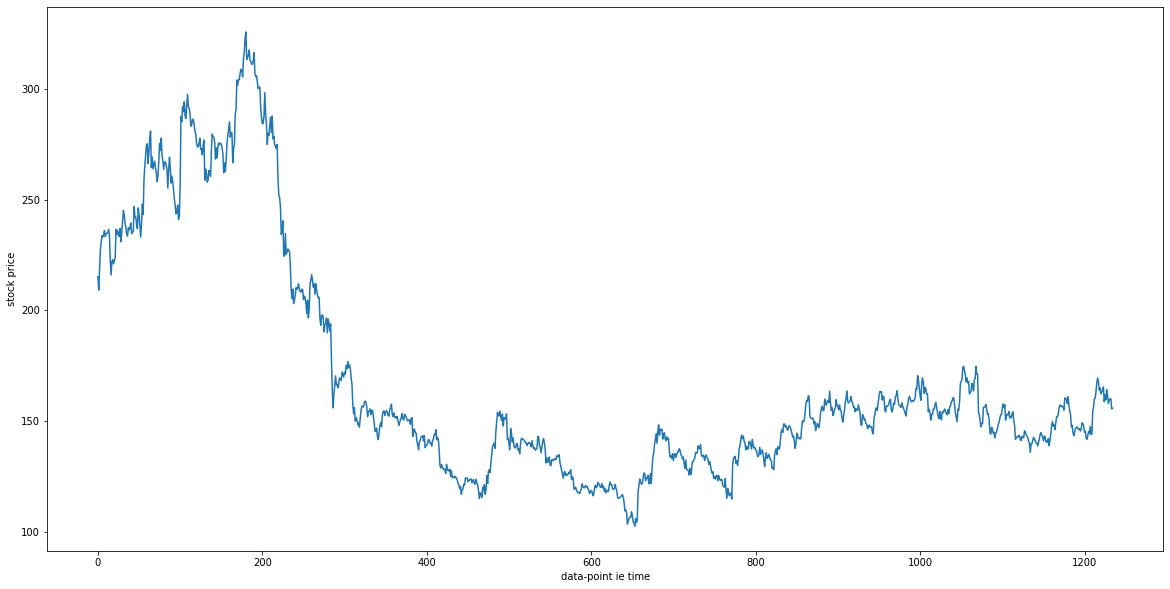

In [ ]:
plt.plot(df1)
plt.xlabel("data-point ie time")
plt.ylabel("stock price")

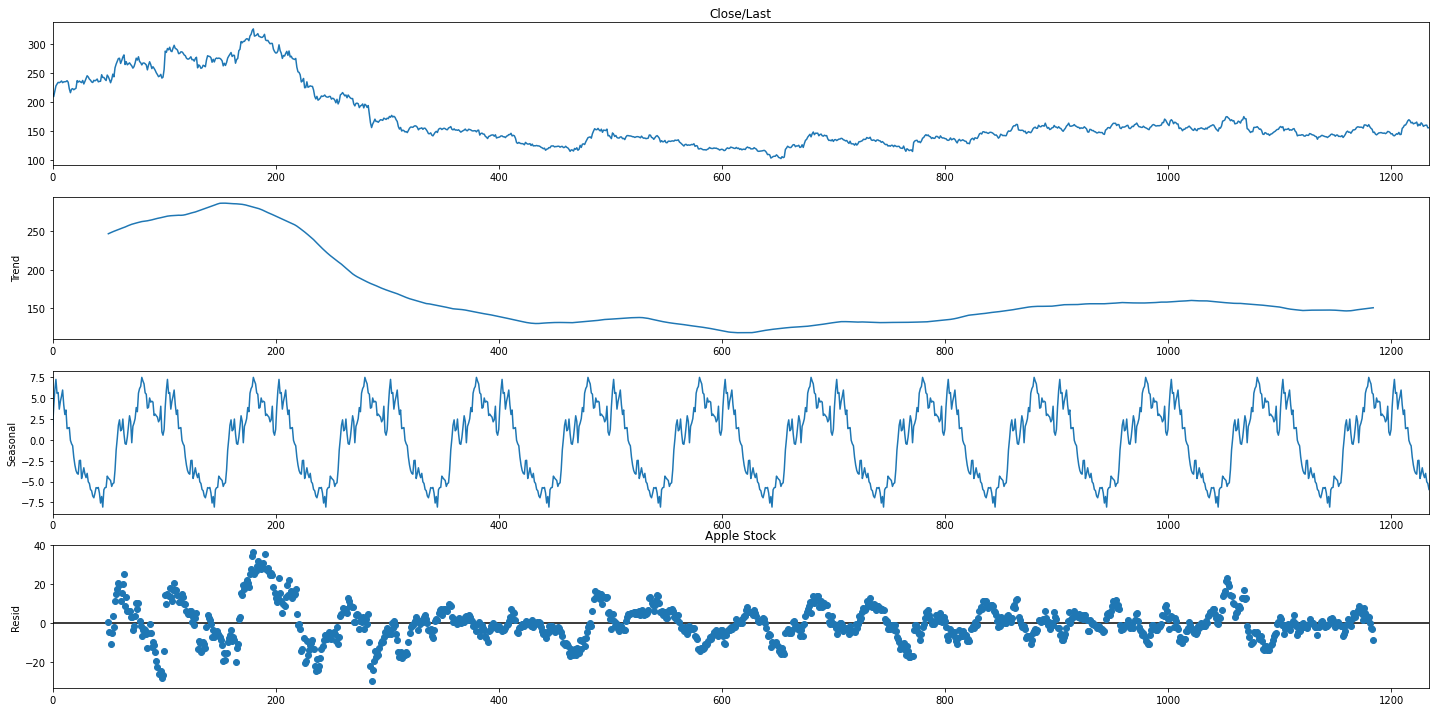

In [ ]:
#show the components of this time series
from statsmodels.tsa.seasonal import seasonal_decompose

result  = seasonal_decompose(pd.Series(df1),period=100)

result.plot()
plt.title('Apple Stock')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
df1.shape

(1235,)

In [ ]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)
print('\n df1 present shape : ', df1.shape)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]

 df1 present shape :  (1235, 1)


### splitting data (70/30)

In [ ]:
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
print('Training Size : ',training_size)
print('Test Size : ',test_size)

Training Size :  864
Test Size :  371


In [ ]:
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:]
print('Training Data Shape : ', train_data.shape)
print('Test Data Shape: ', test_data.shape)

Training Data Shape :  (864, 1)
Test Data Shape:  (371, 1)


### | windowing data set |

In [ ]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
window = 100
X_train, y_train = create_dataset(train_data, window=100)
X_test, y_test = create_dataset(test_data, window=100)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(763, 100) (763,)
(270, 100) (270,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

### lstm coding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### fitting data to model

In [ ]:
model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 2, batch_size=64,verbose=1)

Epoch 1/2
12/12 [==============================] - 9s 320ms/step - loss: 0.0438 - val_loss: 0.0011
Epoch 2/2
12/12 [==============================] - 2s 201ms/step - loss: 0.0111 - val_loss: 0.0037


In [ ]:
y_pred = scaler.inverse_transform(model.predict(X_test))

9/9 [==============================] - 1s 37ms/step


In [ ]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
y_pred[:5]

array([[168.91498],
       [169.10895],
       [169.25432],
       [169.33308],
       [169.35452]], dtype=float32)

In [ ]:
y_test[:5]

array([[159.9 ],
       [155.25],
       [154.2 ],
       [155.85],
       [158.25]])

### evaluation

In [ ]:
import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error(test) : ',rmse_score)

Root Mean Squared Error(test) :  13.47986019667045


In [ ]:
from sklearn.metrics import r2_score
print('R-squared Score  : ',r2_score(y_test,y_pred))

R-squared Score  :  -1.4913390467731311


### visualization + plotting

24/24 [==============================] - 1s 36ms/step


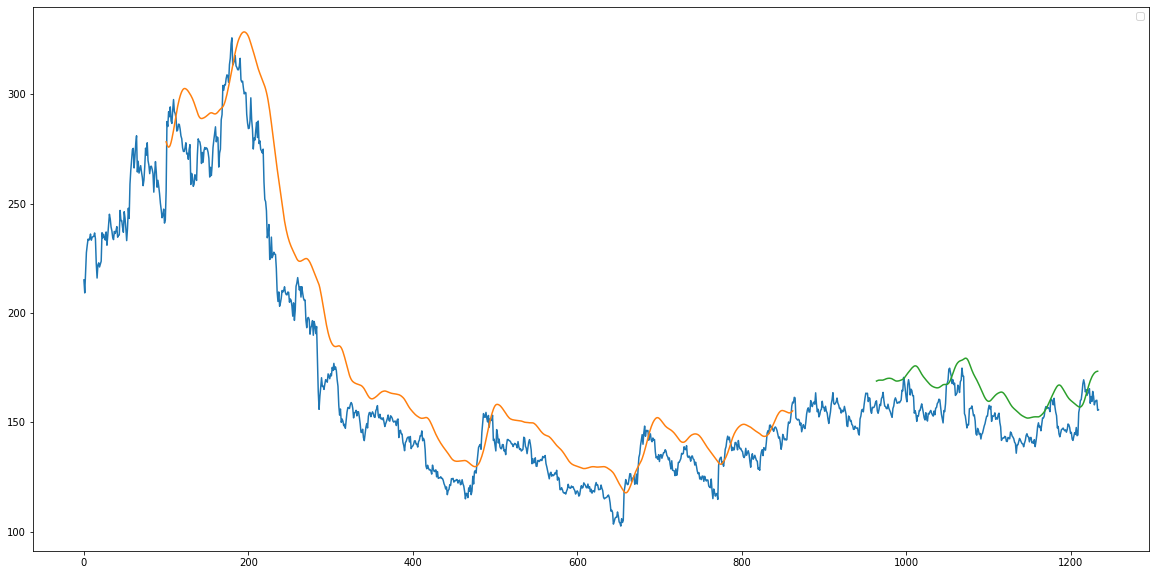

In [ ]:
# shift train predictions for plotting
train_predict = scaler.inverse_transform(model.predict(X_train))

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = y_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

### predicting 30 Days future value

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
print(scaler.inverse_transform(lst_output))

[[173.29100536]
 [173.23899768]
 [173.31902382]
 [173.56153573]
 [173.9689935 ]
 [174.52791318]
 [175.21740391]
 [176.01431425]
 [176.89643686]
 [177.8441442 ]
 [178.84113318]
 [179.87441184]
 [180.93411322]
 [182.01299003]
 [183.1059226 ]
 [184.2095732 ]
 [185.32173439]
 [186.44128916]
 [187.56755931]
 [188.70042517]
 [189.83993992]
 [190.98634294]
 [192.13988687]
 [193.30090416]
 [194.46964747]
 [195.64636946]
 [196.8312563 ]
 [198.02450745]
 [199.22626919]
 [200.4366479 ]]


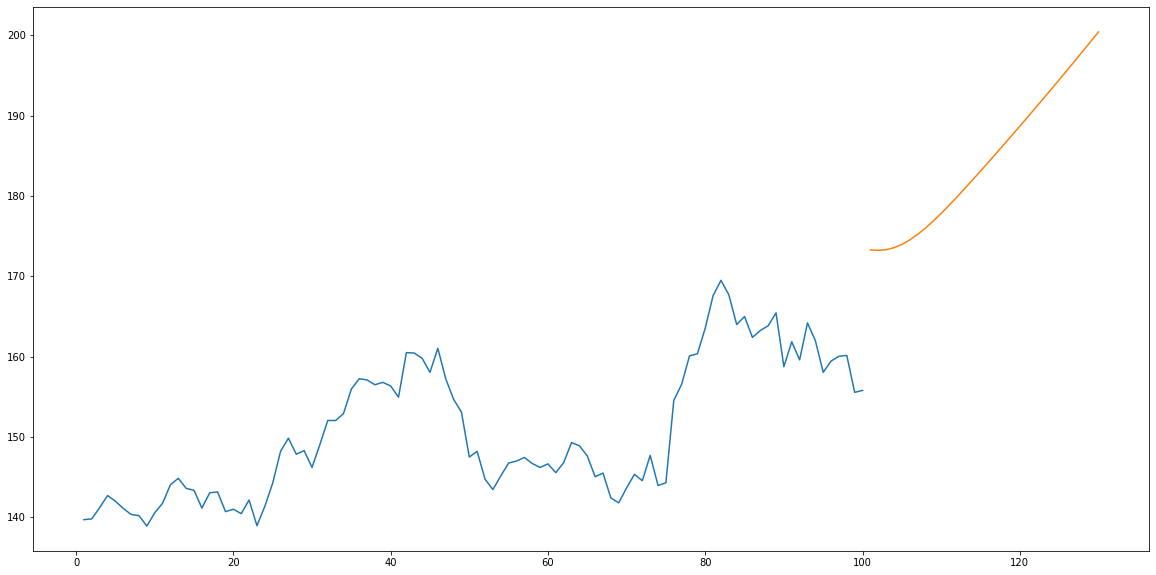

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))